In [98]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier as KN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
columns=['party']+['proposal'+str(x) for x in range(1,17)]
data=pd.read_csv('C:/Users/Jaqen/Desktop/house-votes-84.csv',names=columns)
data[data=='y']=1
data[data=='?']=0
data[data=='n']=-1
data[data=='republican']=1
data[data=='democrat']=0
data.sort_values(by='party',inplace=True)
data

,party,proposal1,proposal2,proposal3,proposal4,proposal5,proposal6,proposal7,proposal8,proposal9,proposal10,proposal11,proposal12,proposal13,proposal14,proposal15,proposal16
370,0,1,1,1,-1,0,1,1,1,-1,1,0,0,-1,-1,1,1
200,0,-1,-1,1,-1,-1,-1,1,1,1,-1,-1,-1,-1,1,1,1
199,0,1,1,-1,-1,-1,-1,1,1,0,-1,1,-1,-1,-1,1,0
198,0,-1,-1,1,-1,-1,-1,1,1,1,1,1,-1,0,-1,1,0
196,0,-1,-1,1,-1,-1,1,1,1,1,-1,1,1,-1,1,1,0
360,0,1,-1,1,-1,-1,1,1,1,1,1,-1,-1,1,-1,-1,1
194,0,-1,-1,1,-1,-1,1,1,0,1,1,1,-1,-1,-1,1,1
201,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,1,1
193,0,-1,-1,1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,1,1
361,0,1,-1,1,-1,1,1,1,-1,1,1,-1,-1,1,1,-1,0


In [91]:
class my_knn(object):
    def __init__(self):
        pass
    def fit(self,X,Y,n_neighbors):
        self.X=X
        self.Y=Y
        self.n_neighbors=n_neighbors
    def distance(self,x):
        return ((x-self.X)**2).sum(axis=1)**0.5
    def predict(self,X):
        predict=[]
        for i in range(X.shape[0]):
            count={} #储存前k个最小距离中不同label的个数
            dis=self.distance(X[i,:]) #到每一个样本的距离
            sort_index=dis.argsort()#储存从小到大排序后 原来的索引
            
            for j in range(self.n_neighbors):
                label=self.Y[sort_index[j]]
                count[label]=count.get(label,0)+1
                
            maxcount=0
            for key,value in count.items():
                if value>maxcount:
                    maxcount=value
                    maxindex=key 
            predict.append(maxindex)
        return np.array(predict)
    def score(self,X,Y):   #正确率
        y=self.predict(X)
        lst=list(y==Y)
        return lst.count(True)/len(lst)

[0.4626477  0.08919882]


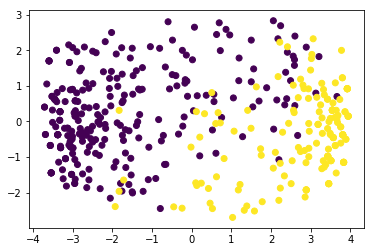

In [95]:
import matplotlib.pyplot as plt
scaler=StandardScaler()
X=data.values[:,1:]
X=scaler.fit_transform(X)
pca=PCA(n_components=2)
X=pca.fit_transform(X) #降维
print(pca.explained_variance_ratio_)
Y=data.values[:,0]

f1=plt.figure()
ax=f1.add_subplot(111)
ax.scatter(X[:,0],X[:,1],c=Y,marker='o')
plt.show()

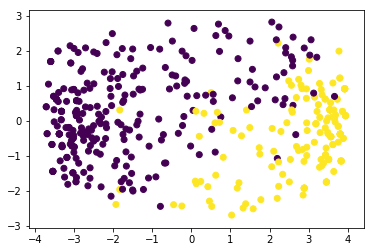

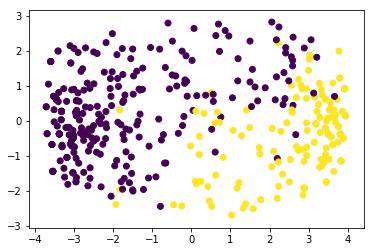

score of knn_1: 0.9236641221374046
score of knn_2: 0.9389312977099237


In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

knn1=my_knn()
knn1.fit(X_train,Y_train,10)
Y_pred1=knn1.predict(X_test)
knn2=my_knn()
knn2.fit(X_train,Y_train,15)
Y_pred2=knn2.predict(X_test)

f2=plt.figure()
bx=f2.add_subplot(111)
bx.scatter(X_train[:,0],X_train[:,1],c=Y_train,marker='o')
bx.scatter(X_test[:,0],X_test[:,1],c=Y_pred1,marker='o')

f3=plt.figure()
cx=f3.add_subplot(111)
cx.scatter(X_train[:,0],X_train[:,1],c=Y_train,marker='o')
cx.scatter(X_test[:,0],X_test[:,1],c=Y_pred2,marker='o')
plt.show()

print("score of knn_1:",knn1.score(X_test,Y_test))
print("score of knn_2:",knn2.score(X_test,Y_test))

C:\Users\Jaqen\x\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\Jaqen\x\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


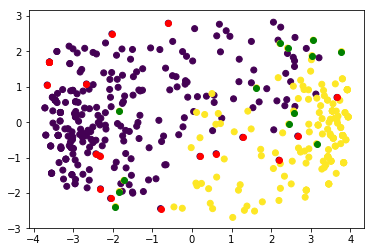

In [89]:
from sklearn.neighbors import LocalOutlierFactor as LF

n=len(data[data.party==0])
m=len(data)
X0=X[:n,:]
X1=X[n:m,:]

model=LF(n_neighbors=15,novelty=True)
model.fit(X0)
y0=model._predict(X0)
model.fit(X1)
y1=model._predict(X1)

f1=plt.figure()
ax=f1.add_subplot(111)
ax.scatter(X[:,0],X[:,1],c=Y,marker='o')

x0=np.array([[X0[i,0],X0[i,1]] for i in range(len(y0)) if (y0[i]==-1)])
x1=np.array([[X1[i,0],X1[i,1]] for i in range(len(y1)) if (y1[i]==-1)])
ax.scatter(x0[:,0],x0[:,1],c='r',marker='o')
ax.scatter(x1[:,0],x1[:,1],c='g',marker='o')
plt.show()